In [1]:
## import the csv files

In [2]:
import pandas as pd
import numpy as np

In [3]:
# amazon=pd.read_csv("Seventh Generation Toilet Tissue Recycled.csv")
amazon=pd.read_csv("Amazon Reviews Validation Data_1.csv")
# amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")

In [4]:
amazon[:5]

,Reviews,Aspect
0,The settings are perfect for all hair types,Adaptability
1,with lots of settings,Adaptability
2,heating element has died,Durability
3,"Also, the diffuser does not stay on at all.",Ease of Use
4,and it won't stay on it at all. Just flys off....,Ease of Use


In [5]:
movie=pd.read_csv("imdb-Dataset.csv")

In [30]:
movie[:5]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
yelp=pd.read_csv("yelp.csv")

In [24]:
yelp[:5]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## combining all the review in one file 

In [6]:
# a=amazon[:100]['review_text']
a=amazon['Review']

KeyError: 'Review'

In [ ]:
m=movie[:100]['review']
y=yelp[:100]['text']

In [ ]:
combined=pd.concat([a,m,y])

In [7]:
combined= amazon["Reviews"]

In [8]:
import re

In [9]:
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [10]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r"<.*?>", "", text)
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # print(filtered_tokens)
    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    processed_text = " ".join(filtered_tokens)

    
    return processed_text

In [11]:
processed_series = combined.apply(preprocess_text)

In [12]:
processed_series

0                             settings perfect hair types
1                                           lots settings
2                                    heating element died
3                                      also diffuser stay
4                               wo stay flys see one work
                              ...                        
1176                                     top longer stays
1177                           unfortunately one lids fit
1178                cheap enough husband loses one wo cry
1179                                     economical price
1180    also way seal drinking hole car hit bump stop ...
Name: Reviews, Length: 1181, dtype: object

In [13]:
from gensim.models import Word2Vec

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the documents and transform the documents into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(processed_series)

In [16]:
tfidf_vectors

<1181x1711 sparse matrix of type '<class 'numpy.float64'>'
	with 5325 stored elements in Compressed Sparse Row format>

In [17]:
for i in range(len(processed_series)):
    print(f"Document {i+1}:")
    print(tfidf_vectors[i].toarray())
    print()

Document 1:
[[0. 0. 0. ... 0. 0. 0.]]

Document 2:
[[0. 0. 0. ... 0. 0. 0.]]

Document 3:
[[0. 0. 0. ... 0. 0. 0.]]

Document 4:
[[0. 0. 0. ... 0. 0. 0.]]

Document 5:
[[0. 0. 0. ... 0. 0. 0.]]

Document 6:
[[0. 0. 0. ... 0. 0. 0.]]

Document 7:
[[0. 0. 0. ... 0. 0. 0.]]

Document 8:
[[0. 0. 0. ... 0. 0. 0.]]

Document 9:
[[0. 0. 0. ... 0. 0. 0.]]

Document 10:
[[0. 0. 0. ... 0. 0. 0.]]

Document 11:
[[0. 0. 0. ... 0. 0. 0.]]

Document 12:
[[0. 0. 0. ... 0. 0. 0.]]

Document 13:
[[0. 0. 0. ... 0. 0. 0.]]

Document 14:
[[0. 0. 0. ... 0. 0. 0.]]

Document 15:
[[0. 0. 0. ... 0. 0. 0.]]

Document 16:
[[0. 0. 0. ... 0. 0. 0.]]

Document 17:
[[0. 0. 0. ... 0. 0. 0.]]

Document 18:
[[0. 0. 0. ... 0. 0. 0.]]

Document 19:
[[0. 0. 0. ... 0. 0. 0.]]

Document 20:
[[0. 0. 0. ... 0. 0. 0.]]

Document 21:
[[0. 0. 0. ... 0. 0. 0.]]

Document 22:
[[0. 0. 0. ... 0. 0. 0.]]

Document 23:
[[0. 0. 0. ... 0. 0. 0.]]

Document 24:
[[0. 0. 0. ... 0. 0. 0.]]

Document 25:
[[0. 0. 0. ... 0. 0. 0.]]

Document 

In [18]:
df=pd.DataFrame(tfidf_vectors.toarray())

In [19]:
df.to_csv("tfidf.csv")

In [20]:
from sklearn.cluster import KMeans

In [21]:
from collections import defaultdict

In [22]:
# Perform clustering using K-means
num_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_vectors)

# Get cluster labels
labels = kmeans.labels_

# Create a dictionary to store documents for each cluster
cluster_documents = defaultdict(list)

for i, doc in enumerate(processed_series):
    cluster_label = labels[i]
    cluster_documents[cluster_label].append(doc)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
# Print the aspects/topics
for cluster_label, docs in cluster_documents.items():
    print(f"Aspect {cluster_label}:")
    for doc in docs:
        print(doc)
    print()

Aspect 0:
settings perfect hair types
lots settings
heating element died
also diffuser stay
wo stay flys see one work
complaint concentrator fit perfectly pop middle everything
burns clients medium setting
also diffuser stay
wo stay flys see one work
get hot sweaty either
complaint concentrator fit perfectly pop middle everything
oh hair frizzy either best beauty purchase ever made
quiet make feel like standing next jet engine
without frizz
wo stay flys see one work
best dryer ever bought
get hot enough low setting
complaint concentrator fit perfectly pop middle everything
dryer excellent
great hair
way effective ones used
dries hair quickly
dries medium length hair quickly
dries fast without lot heat
dries hair half time
drys hair fast
attractive
attractive
stay together well
cleans highly recommended
writing left days gets stuck
increasingly difficult wipe
would come
board wipes pretty easily
great desk work
small
convenient
dry erase marker easily fits top section keep way desk
conv

In [40]:
len(cluster_documents)

4

In [25]:
common_elements_1 = set(cluster_documents[0]) & set(processed_series[:100])
num_common_elements_1 = len(common_elements_1)

In [26]:
common_elements_2 = set(cluster_documents[1]) & set(processed_series[100:200])
num_common_elements_2 = len(common_elements_2)

In [27]:
common_elements_3 = set(cluster_documents[2]) & set(processed_series[200:300])
num_common_elements_3 = len(common_elements_3)

In [28]:
print("Number of common elements:", num_common_elements_1)
print("Number of common elements:", num_common_elements_2)
print("Number of common elements:", num_common_elements_3)

Number of common elements: 80
Number of common elements: 0
Number of common elements: 4


In [29]:
amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")

In [30]:
m=amazon['Review']

In [31]:
q=amazon['Aspect']

In [32]:
all_values = q.str.split(',').explode()

In [33]:
unique_values = all_values.unique()

In [34]:
len_aspect=len(unique_values)

In [35]:
processed_series = m.apply(preprocess_text)

In [36]:
m

0                  It dries my hair without all the frizz
1        So glad I did! It dries my hair in half the time
2             Also, the diffuser does not stay on at all.
3                             Best dryer I EVER BOUGHT!!!
4       It dries my medium length hair quickly, and I ...
                              ...                        
1022                                            it's ugly
1023    It works really good but when you have automat...
1024                         High quality fans work well.
1025                Also too wide of a gap when installed
1026                 Did not fit car window as advertised
Name: Review, Length: 1027, dtype: object

In [29]:
# Step 2: Convert text to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_series).toarray()

In [30]:
type(X)

numpy.ndarray

In [31]:
import skfuzzy as fuzz

In [32]:
# Step 3: Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T,  # transpose data because cmeans assumes each column is a data point
    c=len_aspect,  # number of clusters
    m=2,  # fuzziness parameter
    error=0.005,
    maxiter=1000
)

NameError: name 'len_aspect' is not defined

In [33]:
cluster_membership = np.argmax(u, axis=0)
print("Cluster Membership:", cluster_membership)


NameError: name 'u' is not defined

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

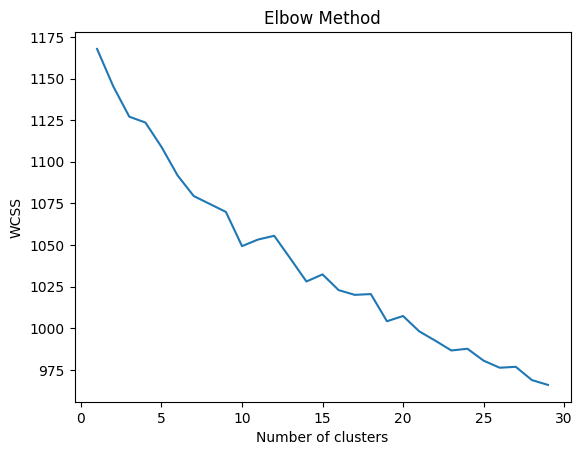

In [35]:
wcss=[]
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
from sklearn.preprocessing import normalize
word_vectors = normalize(X) 
centroids = word_vectors[np.random.choice(word_vectors.shape[0], num_clusters, replace=False), :]

num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(word_vectors)

# Final cluster assignments
print("Cluster labels:", labels)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster labels: [4 4 4 ... 4 4 4]


/var/folders/p1/6w1txg1s1rj5tv4tp55vh74r0000gn/T/ipykernel_84013/1391502689.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('tab10')
/var/folders/p1/6w1txg1s1rj5tv4tp55vh74r0000gn/T/ipykernel_84013/1391502689.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colormap(i / len(np.unique(labels))), label=f'Cluster {label+1}')


IndexError: index 1181 is out of bounds for axis 0 with size 1181

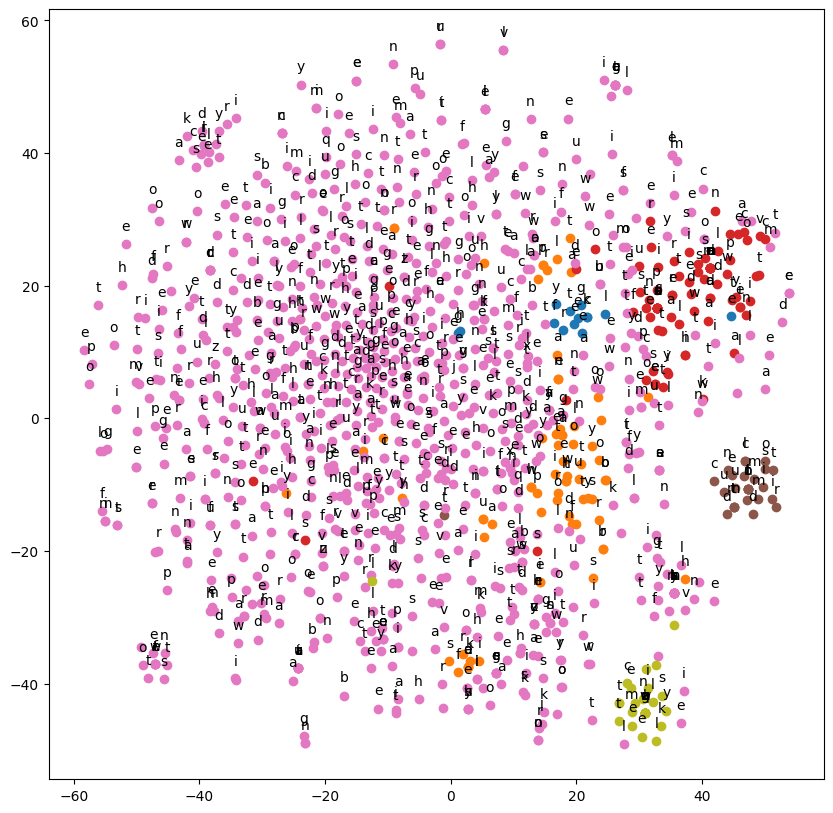

In [43]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(X)


# Get a colormap
colormap = get_cmap('tab10')

# Scatter plot for each cluster
plt.figure(figsize=(10, 10))
for i, label in enumerate(np.unique(labels)):
    cluster_points = word_vectors_2d[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colormap(i / len(np.unique(labels))), label=f'Cluster {label+1}')


# Annotate points with the corresponding words
words = [word for sentence in processed_series for word in sentence]
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Word Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


/var/folders/p1/6w1txg1s1rj5tv4tp55vh74r0000gn/T/ipykernel_84013/2241626377.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')
/var/folders/p1/6w1txg1s1rj5tv4tp55vh74r0000gn/T/ipykernel_84013/2241626377.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],


IndexError: index 1181 is out of bounds for axis 0 with size 1181

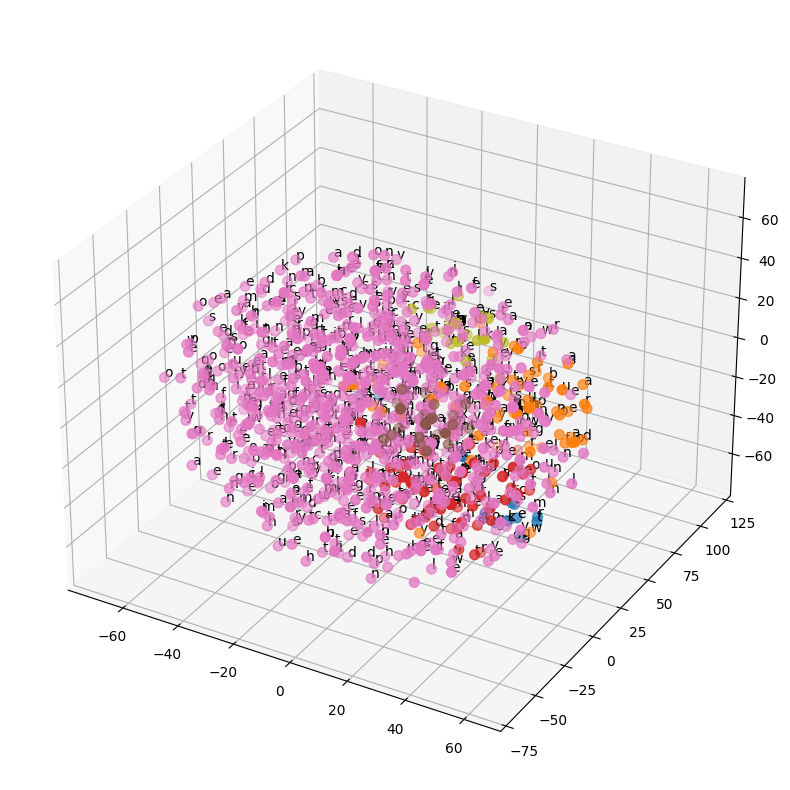

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=3, random_state=0)
word_vectors_3d = tsne.fit_transform(word_vectors)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get a colormap
colormap = plt.cm.get_cmap('tab10')

# Scatter plot for each cluster
for i, label in enumerate(np.unique(labels)):
    cluster_points = word_vectors_3d[labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
               c=colormap(i / len(np.unique(labels))), label=f'Cluster {label+1}', s=50)

# Annotate points with the corresponding words
words = [word for sentence in processed_series for word in sentence]
for i, word in enumerate(words):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], word)

# Add labels and title
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.title('Word Clusters in 3D')
plt.legend()

# Show the plot
plt.show()


In [45]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(X)
new_values = PCA_model.transform(X)

In [46]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (1181, 2)
[[-0.03520271 -0.01643989]
 [-0.03034612 -0.01079508]
 [-0.03047447 -0.01096282]
 ...
 [-0.03190856 -0.01573563]
 [-0.06584507 -0.06364808]
 [-0.03732907 -0.01692898]]


In [49]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for the data
df = pd.DataFrame({
    'x': X[:, 0],
    'y': X[:, 1],
    'label': processed_series
})

# Create the scatter plot with plotly
fig = px.scatter(df, x='x', y='y', hover_name='label')




In [50]:
import plotly.io as pio
pio.renderers.default = "browser"

fig.show()

In [49]:
centroids = new_values[np.random.choice(new_values.shape[0], num_clusters, replace=False), :]

num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(word_vectors)

# Final cluster assignments
print("Cluster labels:", labels)

NameError: name 'new_values' is not defined

In [50]:
centroids = kmeans.cluster_centers_
# Create a DataFrame for the data
df = pd.DataFrame({
    'x': new_values[:, 0],
    'y': new_values[:, 1],
    'label': processed_series,
    'cluster': labels
})

# Create the scatter plot with plotly for data points
fig = px.scatter(df, x='x', y='y', color='cluster', hover_name='label')

# Add centroids to the scatter plot
for centroid in centroids:
    fig.add_scatter(x=[centroid[0]], y=[centroid[1]], mode='markers', 
                    marker=dict(size=10, color='black', symbol='cross'))

# Show the plot
fig.show()

NameError: name 'new_values' is not defined

cosine

In [47]:
from sklearn.preprocessing import normalize
word_vectors = normalize(word_vectors) 
centroids = word_vectors[np.random.choice(word_vectors.shape[0], num_clusters, replace=False), :]

num_clusters = 25

# K-means clustering with cosine similarity
for i in range(100):  # 100 iterations; can also use convergence criteria
    # Compute cosine similarity
    similarity = np.dot(word_vectors, centroids.T)
    
    # Assign labels based on maximum similarity
    labels = np.argmax(similarity, axis=1)
    
    # Recompute centroids
    for j in range(num_clusters):
        centroids[j] = np.mean(word_vectors[labels == j], axis=0)

# Final cluster assignments
print("Cluster labels:", labels)

Cluster labels: [ 1  6  7 ... 22  2 10]


In [48]:
import plotly.graph_objects as go

df = pd.DataFrame({
    'x': word_vectors_2d[:, 0],
    'y': word_vectors_2d[:, 1],
    'label': processed_series,
    'cluster': labels
})

fig = go.Figure()

for i, label in enumerate(np.unique(labels)):
    cluster_df = df[df['cluster'] == label]
    fig.add_trace(go.Scatter(x=cluster_df['x'], y=cluster_df['y'],
                             mode='markers',
                             marker=dict(size=6),
                             hovertext=cluster_df['label'],   # This will show the text when hovering
                             hoverinfo="text",  # Display custom text on hover
                             name=f'Cluster {label+1}'))

fig.update_layout(title='Document Clusters',
                  xaxis_title='t-SNE 1',
                  yaxis_title='t-SNE 2')
fig.show()

In [ ]:
# plot the graph as it is without any dimensionality reduction
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
